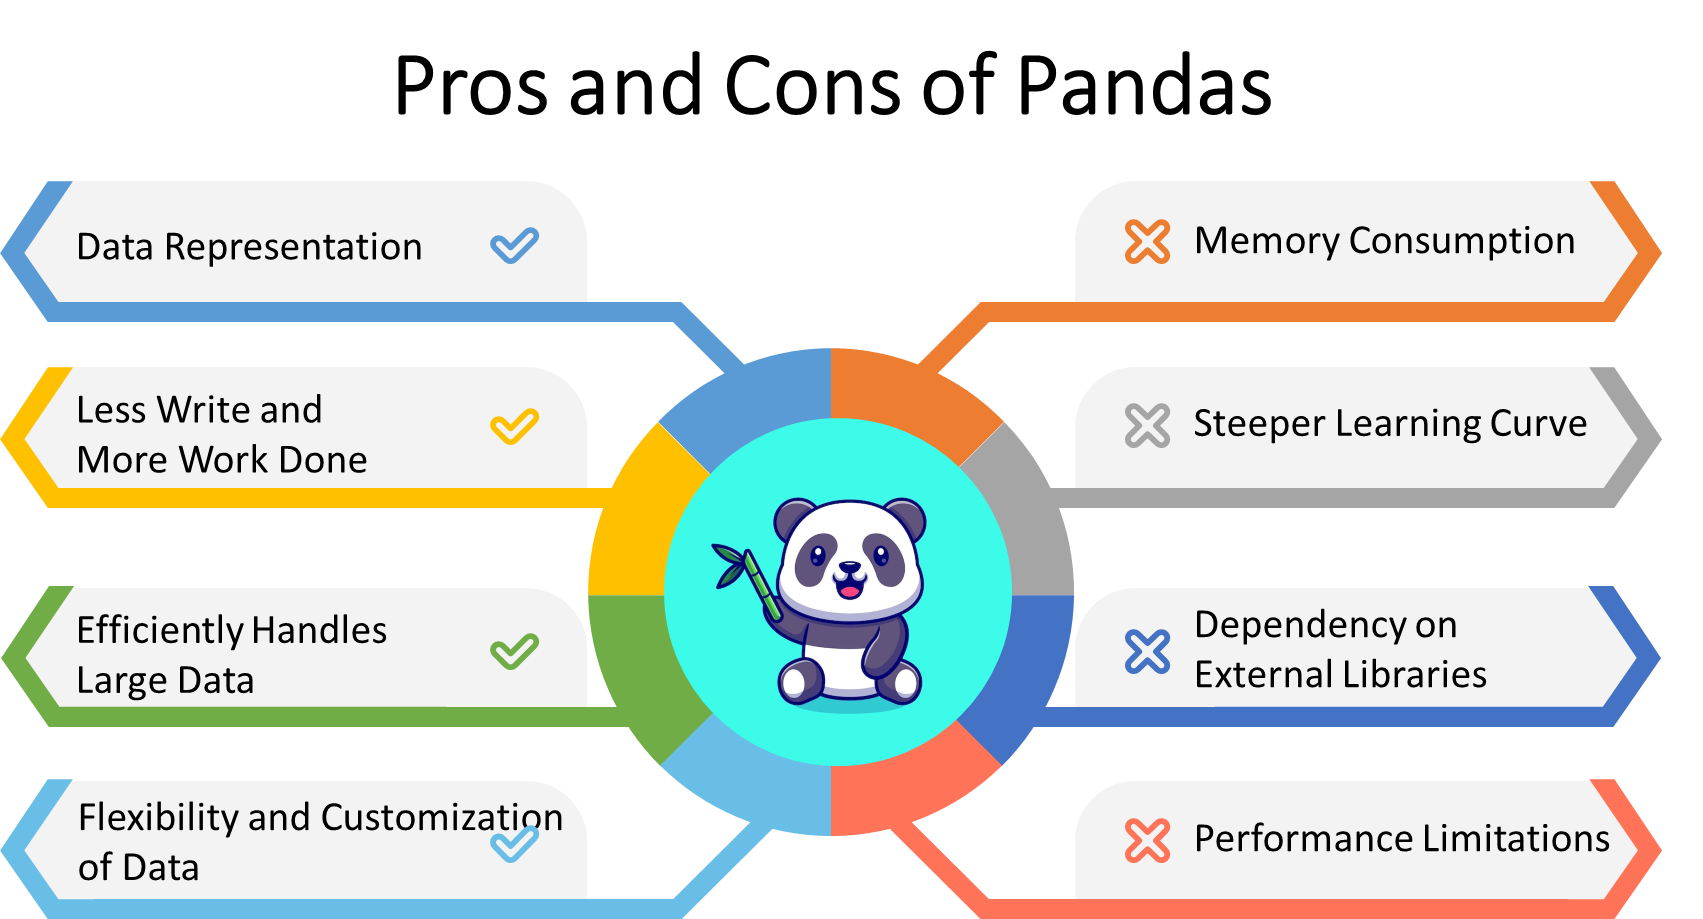

# Explanation
Creating DataFrames: Demonstrates how to create a DataFrame from a dictionary.
Viewing Data: Shows how to view the first few rows, get information about the DataFrame, and describe its statistics.
Selecting Data: Demonstrates how to select single/multiple columns and rows by index and condition.
Adding and Dropping Columns: Adds a new column and drops an existing one.
Renaming Columns: Renames columns in the DataFrame.
Handling Missing Data: Adds a row with missing data, fills missing values, and drops rows with missing data.
Sorting Data: Sorts the DataFrame by a specific column.
Grouping and Aggregating Data: Groups data by a column and performs aggregate operations.
Merging and Joining DataFrames: Merges two DataFrames on a common column.
Pivot Tables: Creates a pivot table from the DataFrame.
Handling Date Data: Creates a DataFrame with date data and sets the date as the index.
DataFrame I/O: Saves the DataFrame to a CSV file and loads it back.

In [1]:
import pandas as pd
import numpy as np

# 1. Creating DataFrames
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Salary': [70000, 80000, 50000, 120000, 90000]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# 2. Viewing Data
print("\nDataFrame Head:\n", df.head())
print("\nDataFrame Info:\n", df.info())
print("\nDataFrame Describe:\n", df.describe())

# 3. Selecting Data
print("\nSelect single column:\n", df['Name'])
print("\nSelect multiple columns:\n", df[['Name', 'City']])
print("\nSelect rows by index:\n", df.iloc[1:3])
print("\nSelect rows by condition:\n", df[df['Age'] > 25])

# 4. Adding and Dropping Columns
df['Department'] = ['HR', 'Finance', 'IT', 'Management', 'Sales']
print("\nDataFrame with new column:\n", df)

df.drop('Department', axis=1, inplace=True)
print("\nDataFrame after dropping column:\n", df)

# 5. Renaming Columns
df.rename(columns={'Name': 'Employee Name', 'City': 'Location'}, inplace=True)
print("\nDataFrame after renaming columns:\n", df)

# 6. Handling Missing Data
df.loc[5] = ['Frank', np.nan, 'Seattle', 110000]  # Adding a row with missing age
print("\nDataFrame with missing data:\n", df)

# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
print("\nDataFrame after filling missing values:\n", df)

# Drop rows with missing values
df.dropna(inplace=True)
print("\nDataFrame after dropping rows with missing values:\n", df)

# 7. Sorting Data
df_sorted = df.sort_values(by='Salary', ascending=False)
print("\nDataFrame sorted by Salary (descending):\n", df_sorted)

# 8. Grouping and Aggregating Data
df_grouped = df.groupby('Location').agg({'Salary': 'mean', 'Age': 'max'})
print("\nGrouped and Aggregated DataFrame:\n", df_grouped)

# 9. Merging and Joining DataFrames
data2 = {
    'Location': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'State': ['NY', 'CA', 'IL', 'TX', 'AZ']
}
df2 = pd.DataFrame(data2)

df_merged = pd.merge(df, df2, on='Location', how='inner')
print("\nMerged DataFrame:\n", df_merged)

# 10. Pivot Tables
pivot_table = df.pivot_table(values='Salary', index='Location', columns='Employee Name', aggfunc=np.sum)
print("\nPivot Table:\n", pivot_table)

# 11. Handling Date Data
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
df_date = pd.DataFrame(date_rng, columns=['Date'])
df_date['Data'] = np.random.randint(0, 100, size=(len(date_rng)))
print("\nDataFrame with Date:\n", df_date)

# Setting Date as Index
df_date.set_index('Date', inplace=True)
print("\nDataFrame with Date as Index:\n", df_date)

# 12. DataFrame I/O
# Saving to CSV
df.to_csv('dataframe.csv', index=False)
print("\nDataFrame saved to 'dataframe.csv'")

# Loading from CSV
df_loaded = pd.read_csv('dataframe.csv')
print("\nDataFrame loaded from 'dataframe.csv':\n", df_loaded)


Original DataFrame:
       Name  Age         City  Salary
0    Alice   24     New York   70000
1      Bob   27  Los Angeles   80000
2  Charlie   22      Chicago   50000
3    David   32      Houston  120000
4      Eva   29      Phoenix   90000

DataFrame Head:
       Name  Age         City  Salary
0    Alice   24     New York   70000
1      Bob   27  Los Angeles   80000
2  Charlie   22      Chicago   50000
3    David   32      Houston  120000
4      Eva   29      Phoenix   90000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
 3   Salary  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes

DataFrame Info:
 None

DataFrame Describe:
              Age         Salary
count   5.000000       5.000000
mean   26.800000   82000.000000
std  